# Transistor BFP640

Se importan las librerias necesarias para trabajar posteriormente.

In [4]:
!pip3 install scikit-rf

In [5]:
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt

In [10]:
path = 'E:\\Documentos\\GitHub\\laboratorios_EA3\\TP2\\bfp_transistor\\SPAR\\BFP640\\BFP640_VCE_'

## Ploteo de parámetros S

Por ejemplo, para una polarización con:
- $V_{CE}=1 \ V$
- $I_C=18 \ mA$

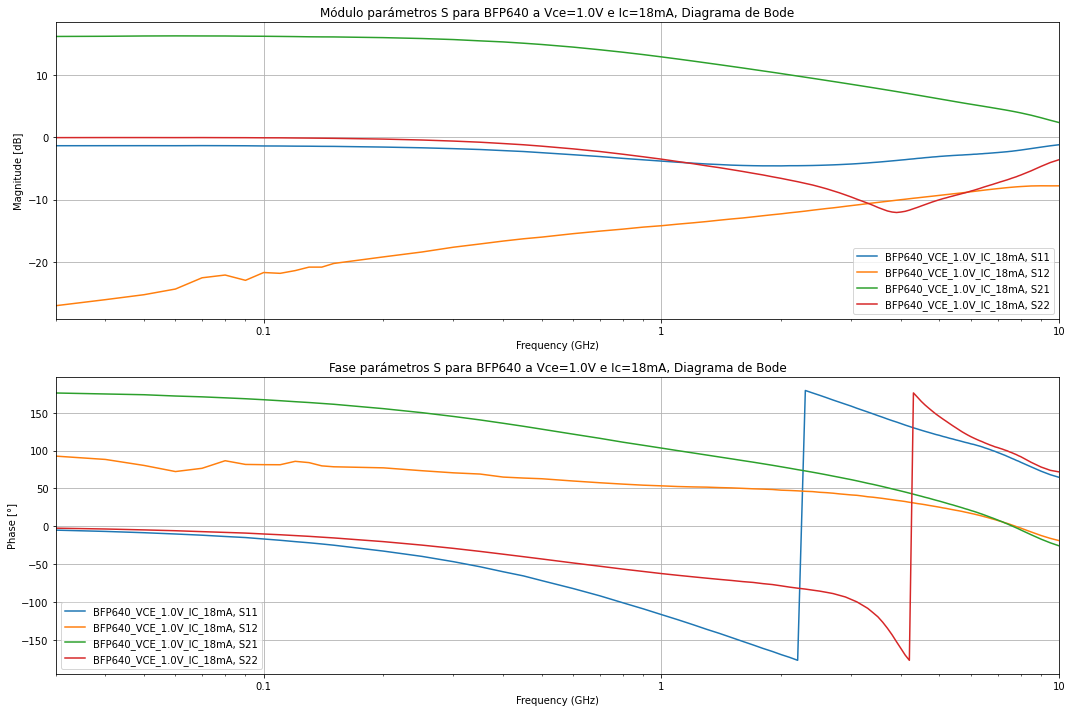

In [31]:
bfp640_1 = rf.Network(path+'1.0V_IC_18mA.s2p')
fig, ax = plt.subplots(2, 1, figsize=(15,10))

ax[0].grid(True)
ax[0].set_title('Módulo parámetros S para BFP640 a Vce=1.0V e Ic=18mA, Diagrama de Bode')
ax[0].set_ylabel('Magnitude [dB]')
ax[0].set_xlabel('Frecuencia [GHz]')
bfp640_1.plot_s_db10(ax=ax[0],  logx=True)

ax[1].grid(True)
ax[1].set_title('Fase parámetros S para BFP640 a Vce=1.0V e Ic=18mA, Diagrama de Bode')
ax[1].set_ylabel('Phase [°]')
ax[1].set_xlabel('Frecuencia [GHz]')
bfp640_1.plot_s_deg(ax=ax[1], logx=True)

plt.tight_layout()
plt.savefig('vce_10_ic_18.pdf')

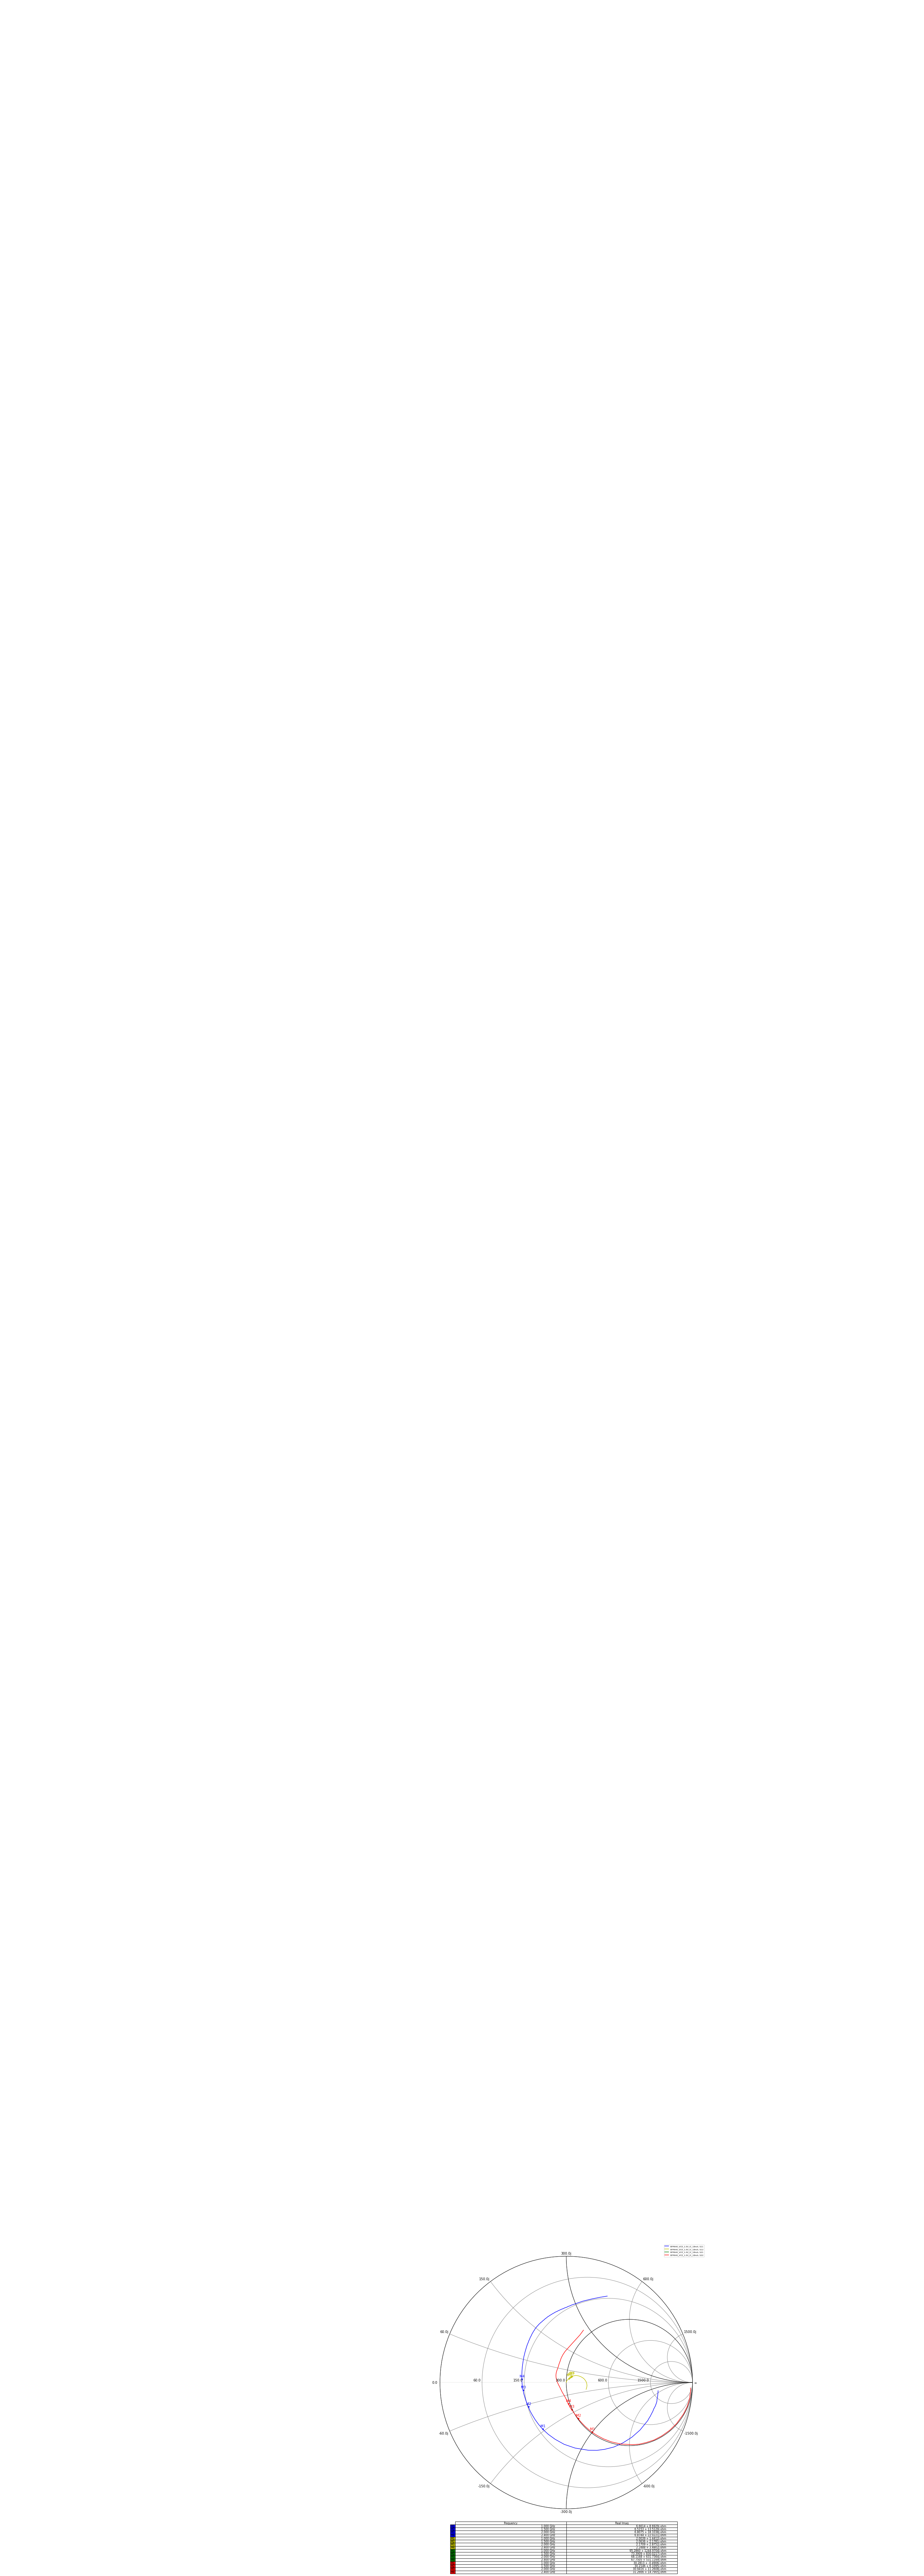

In [64]:
size = bfp640_1.s.real.shape[0]

lines = [
    {'marker_idx': [24,29,34,38], 'color': 'b', 'm': 0, 'n': 0, 'ntw': bfp640_1},
    {'marker_idx': [24,29,34,38], 'color': 'y', 'm': 0, 'n': 1, 'ntw': bfp640_1},
    {'marker_idx': [24,29,34,38], 'color': 'g', 'm': 1, 'n': 0, 'ntw': bfp640_1},
    {'marker_idx': [24,29,34,38], 'color': 'r', 'm': 1, 'n': 1, 'ntw': bfp640_1},
]

fig, ax = plt.subplots(1, 1, figsize=(15,20))

rf.plotting.smith(ax = ax, draw_labels = True, ref_imm = 300, chart_type = 'z')

col_labels = ['Frequency', 'Real Imag']
row_labels = []
row_colors = []
cell_text = []
for l in lines:
    m = l['m']
    n = l['n']
    l['ntw'].plot_s_smith(m=m, n=n, ax = ax, color=l['color'])
    #plot markers
    for i, k in enumerate(l['marker_idx']):
        x = l['ntw'].s.real[k, m, n]
        y = l['ntw'].s.imag[k, m, n]
        z = l['ntw'].z[k, m, n]
        z = f'{z.real:.4f} + {z.imag:.4f}j ohm'
        f = l['ntw'].frequency.f_scaled[k]
        f_unit = l['ntw'].frequency.unit
        row_labels.append(f'M{i + 1}')
        row_colors.append(l['color'])
        ax.scatter(x, y, marker = 'v', s=20, color=l['color'])
        ax.annotate(row_labels[-1], (x, y), xytext=(-7, 7), textcoords='offset points', color=l['color'])
        cell_text.append([f'{f:.3f} {f_unit}', z])
leg1 = ax.legend(loc="upper right", fontsize= 6)

the_table = ax.table(cellText=cell_text,
                      colWidths=[0.4] * 2,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      rowColours=row_colors,
                      loc='bottom')
the_table.auto_set_font_size(False)
the_table.set_fontsize(8)
#the_table.scale(1.5, 1.5)
plt.savefig('vce_10_ic_18_smith.pdf')

## Ejemplo de diseño